In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
df = pd.read_csv("USArrests.csv")

# 'Unnamed: 0' sütununu çıkar
df.drop('Unnamed: 0', axis=1, inplace=True)

# X değişkenine verileri atama
X = df

In [46]:
X

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


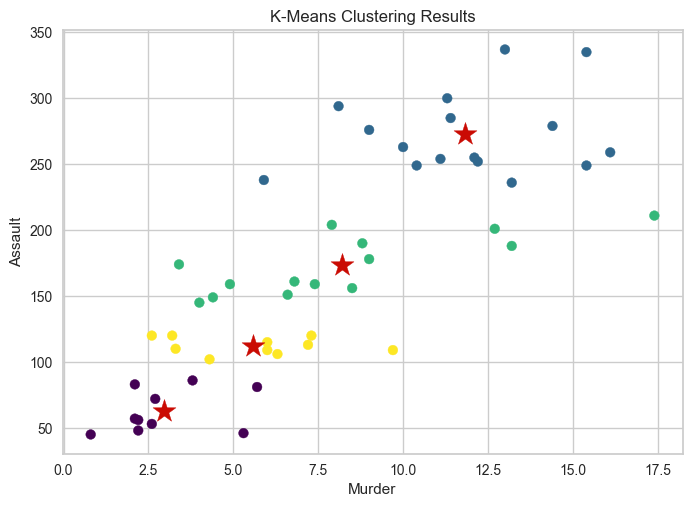

The average silhouette score is: 0.5012332370891494


In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("USArrests.csv")

# 'Unnamed: 0' sütununu çıkar
df.drop('Unnamed: 0', axis=1, inplace=True)

# X değişkenine verileri atama
X = df.values 

#Initialize the KMeans object with 3 clusters
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)

# Fit the KMeans object to the data
kmeans.fit(X)

# Obtain the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('K-Means Clustering Results')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Get the labels and silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

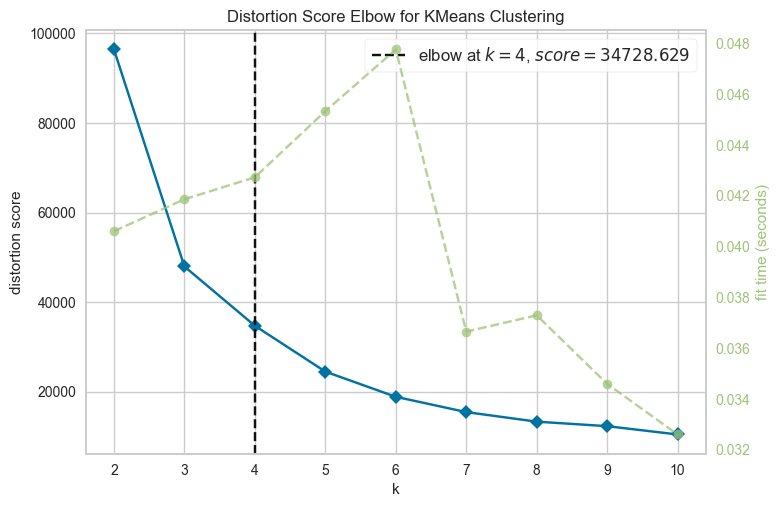

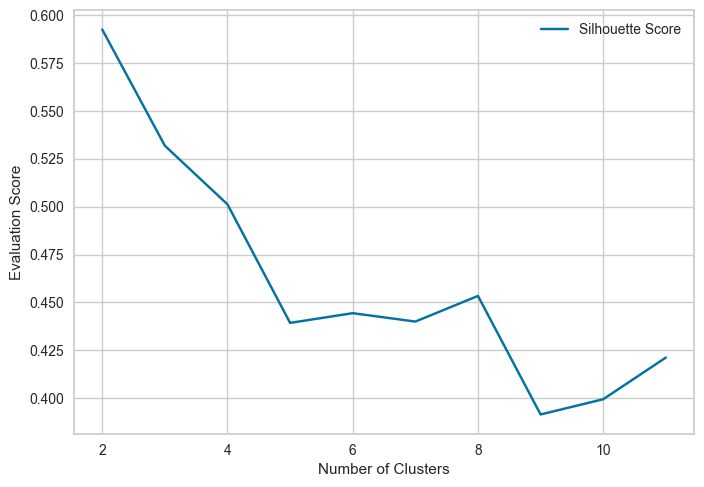

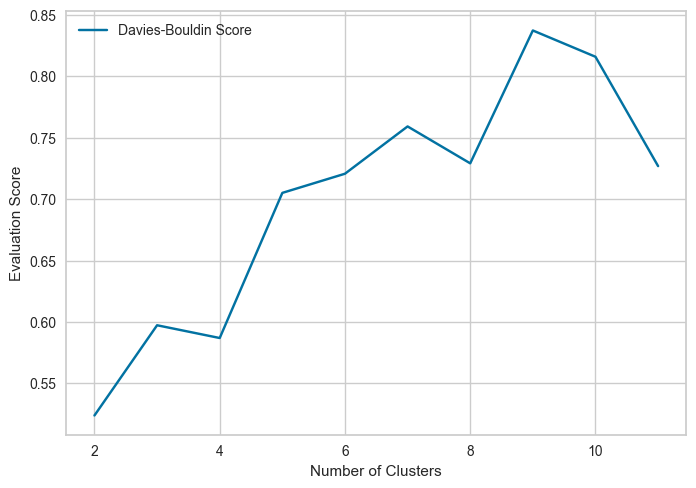

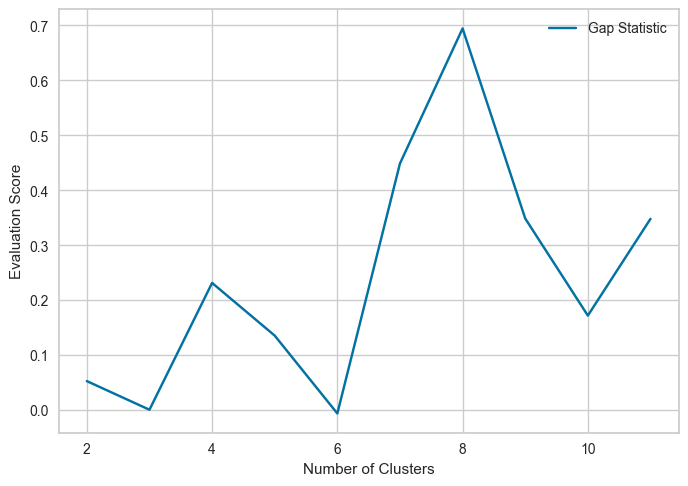

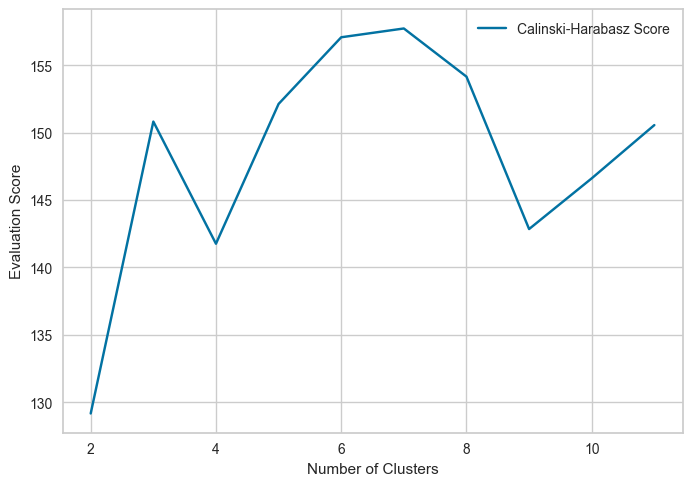

In [53]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd


df = pd.read_csv("USArrests.csv")

# 'Unnamed: 0' sütununu çıkar
df.drop('Unnamed: 0', axis=1, inplace=True)

# X değişkenine verileri atama
X = df.values 


# Define the range of number of clusters to try
n_clusters_range = range(2, 12)

# Initialize empty lists to store the evaluation scores for each method
silhouette_scores = []
ch_scores = []
db_scores = []
gap_scores = []
elbow_scores = []

# Loop through the range of number of clusters to try
for n_clusters in n_clusters_range:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Calculate the silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Calculate the Calinski-Harabasz score and append it to the list
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))

    # Calculate the Davies-Bouldin score and append it to the list
    db_scores.append(davies_bouldin_score(X, kmeans.labels_))

# Use Gap Statistic to determine optimal number of clusters
optimalK = OptimalK()
optimalK(X, cluster_array=np.arange(2, 12))
gap_scores=optimalK.gap_df.gap_value

# Use elbow method to determine optimal number of clusters
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,11))
elbow_visualizer.fit(X)
elbow_visualizer.show()        # Finalize and render the figure

# Plot the evaluation scores for each method
plt.plot(n_clusters_range, silhouette_scores, label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Evaluation Score')
plt.legend()
plt.show()

plt.plot(n_clusters_range, db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Evaluation Score')
plt.legend()
plt.show()

plt.plot(n_clusters_range, gap_scores, label='Gap Statistic')
plt.xlabel('Number of Clusters')
plt.ylabel('Evaluation Score')
plt.legend()
plt.show()

# Plot the evaluation scores for each method
plt.plot(n_clusters_range, ch_scores, label='Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Evaluation Score')
plt.legend()
plt.show()